In [1]:
from selenium import webdriver
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.wait import WebDriverWait

from selenium.webdriver.chrome.options import Options
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
import time

from datetime import datetime, timedelta

In [2]:

class BotInstagram():


    def __init__(self):

        self.ser =  Service('/home/claudio/.wdm/drivers/chromedriver/linux64/99.0.4844.51/chromedriver')
        # option.add_argument('headless')
        op = webdriver.ChromeOptions()
        self.driver = webdriver.Chrome(service = self.ser, options=op)


    def address(self, link):
        
        self.driver.get(link)
    

    
    def login_ig(self, user = '', passd = ''):
        
        self.username = WebDriverWait(self.driver, 10).until(EC.element_to_be_clickable((By.CSS_SELECTOR, "input[name='username']")))
        self.password = WebDriverWait(self.driver, 10).until(EC.element_to_be_clickable((By.CSS_SELECTOR, "input[name='password']")))

        #enter username and password
        # perfilarquivologia 
        self.username.clear()
        self.username.send_keys(user)
        self.password.clear()
        self.password.send_keys(passd)

        button = WebDriverWait(self.driver, 2).until(EC.element_to_be_clickable((By.CSS_SELECTOR, "button[type='submit']"))).click()
        not_now = WebDriverWait(self.driver, 10).until(EC.element_to_be_clickable((By.XPATH, '//button[contains(text(), "Agora não")]'))).click()
        not_now2 = WebDriverWait(self.driver, 10).until(EC.element_to_be_clickable((By.XPATH, '//button[contains(text(), "Agora não")]'))).click()
    

    def search_tags(self, keywords,scrolltimes):
        
        tag = keywords.replace('#','')
    #target the search input field
        self.address(f'https://www.instagram.com/explore/tags/{tag}')

        for i in range(scrolltimes):
            self.driver.execute_script("window.scrollTo(0,document.body.scrollHeight)")
            time.sleep(2)

        # res = self.driver.find_elements(By.CLASS_NAME,'Nnq7C weEfm')
        # print(res)
        # print("fim da pagina")

    def get_status_and_follow_profiles(self, urls, action_follow=False):
        
        
        self.address(urls)
        time.sleep(3)
       
        try:
            posting = self.driver.find_element(By.XPATH,'/html/body/div[1]/section/main/div/header/section/ul/li[1]/div/span').text

        except:
            posting = "0" 
            print("Public - Not found")

        try:
            followers = self.driver.find_element(By.XPATH,'/html/body/div[1]/section/main/div/header/section/ul/li[2]/a/div/span').text

        except:
            followers = "0"
            print("Followers - Not found")
        
        if action_follow:
        
            try:
        
                followbutton = WebDriverWait(self.driver, 10).until(EC.element_to_be_clickable((By.XPATH, '//*[@id="react-root"]/section/main/div/header/section/div[1]/div[1]/div/div/div/span/span[1]/button')))
        
                if followbutton.text == "Seguir" or followbutton.text == "Follow":
        
                    followbutton.click()
                    print(' ### ### Following up new profile. !!!')
        
                else:

                    pass

            except:

                pass

        return posting,followers




    def quit(self):

        self.driver.quit()



In [7]:
bot = BotInstagram()

bot.address('http://www.instagram.com')

with open('login_out.txt') as userfile:
    line = userfile.readline() 
    usuario, senha = line.strip().split(' ')

bot.login_ig(user = usuario, passd = senha)

In [4]:
listapro = []

In [5]:
# kwords = []
with open('keywords.txt','r') as sword:
    lks = sword.readlines()
lks

['#MercadoLivreDeEnergia\n',
 '#ParquesEólicos\n',
 '#EnergiaRenovável\n',
 '#Aerogeradores\n',
 '#EnergiaLimpa\n',
 '#EnergiaLivre']

In [6]:
for iw in lks: # tem na api
    
    tag = iw.strip().replace('\n','').replace('#','').lower()
    #target the search input field
    bot.address(f'https://www.instagram.com/explore/tags/{tag}')

    time.sleep(3)

    tempo = 0
    
    today = datetime.now()
    
    while tempo < 16:
                
        for i in range(3):
            bot.driver.execute_script("window.scrollTo(0,document.body.scrollHeight)")
            time.sleep(1)
        
        res = bot.driver.find_elements(By.TAG_NAME,'a',)
        kk=0
        for uk, cl in enumerate(res):
            ultimo = cl.find_elements(By.CLASS_NAME,"eLAPa")
            if len(ultimo) > 0:
                kk=uk
            else:
                pass


        time.sleep(3)
        res[kk].click()
        time.sleep(3)

        tt = bot.driver.find_element(By.TAG_NAME,'time').get_attribute('datetime')
        time.sleep(1)
        
        fecha = bot.driver.find_element(By.XPATH,'/html/body/div[6]/div[1]/button').click()
        
        tp = datetime.strptime(tt,"%Y-%m-%dT%H:%M:%S.%fZ")
        tempo = (today - tp).days
        print(tempo)
    

    else:
        # time.sleep(1)
        # fecha = bot.driver.find_element(By.XPATH,'/html/body/div[6]/div[1]/button').click()
        time.sleep(3)
        res = bot.driver.find_elements(By.TAG_NAME,'a',)
        time.sleep(1)
        res[0].click()
        
    
    for i in range(len(res)-1):

        time.sleep(5)

        profile = bot.driver.find_element(By.XPATH,'/html/body/div[6]/div[3]/div/article/div/div[2]/div/div/div[1]/div/header/div[2]/div[1]/div[1]/div/span/a').get_attribute('href')

        if profile not in listapro:
            listapro.append(profile)
        
        xpth_bt_flow = '/html/body/div[6]/div[3]/div/article/div/div[2]/div/div/div[1]/div/header/div[2]/div[1]/div[2]/button/div'
        seguir =  bot.driver.find_element(By.XPATH, xpth_bt_flow)
       
        if seguir.text == "Seguir":
            seguir.click()
            print('Seguiuuuuuu !!!')
        else:
            pass
     
        # next page
        bot.driver.find_element(By.XPATH,'/html/body/div[6]/div[2]/div/div/button').send_keys(Keys.ARROW_RIGHT)
    
    print(tag)
    
    bot.quit()
    break
    
with open('lista_hashtag_15days.txt','w') as fileout:
    fileout.write(f"ID\tPerfil\n")
    for k,i in enumerate(listapro):
        fileout.write(f"{k+1}\t{i}\n")

1
3
4
7
10
12
14
14
19
Seguiuuuuuu !!!
Seguiuuuuuu !!!
Seguiuuuuuu !!!
Seguiuuuuuu !!!
Seguiuuuuuu !!!
Seguiuuuuuu !!!
Seguiuuuuuu !!!
Seguiuuuuuu !!!
Seguiuuuuuu !!!
Seguiuuuuuu !!!
Seguiuuuuuu !!!
Seguiuuuuuu !!!
Seguiuuuuuu !!!
Seguiuuuuuu !!!
Seguiuuuuuu !!!
Seguiuuuuuu !!!
Seguiuuuuuu !!!
Seguiuuuuuu !!!
Seguiuuuuuu !!!
Seguiuuuuuu !!!


ElementClickInterceptedException: Message: element click intercepted: Element <div class="_7UhW9   xLCgt        qyrsm           uL8Hv        T0kll ">...</div> is not clickable at point (697, 231). Other element would receive the click: <div class="RnEpo  Yx5HN      " role="presentation">...</div>
  (Session info: chrome=99.0.4844.74)
Stacktrace:
#0 0x5582fb0b57d3 <unknown>
#1 0x5582fae11688 <unknown>
#2 0x5582fae4f298 <unknown>
#3 0x5582fae4cd47 <unknown>
#4 0x5582fae4a4b4 <unknown>
#5 0x5582fae4923c <unknown>
#6 0x5582fae3ca19 <unknown>
#7 0x5582fae656b2 <unknown>
#8 0x5582fae3c2c3 <unknown>
#9 0x5582fae657be <unknown>
#10 0x5582fae78a0c <unknown>
#11 0x5582fae655a3 <unknown>
#12 0x5582fae3addc <unknown>
#13 0x5582fae3bde5 <unknown>
#14 0x5582fb0e649d <unknown>
#15 0x5582fb0ff60c <unknown>
#16 0x5582fb0e8205 <unknown>
#17 0x5582fb0ffee5 <unknown>
#18 0x5582fb0dc070 <unknown>
#19 0x5582fb11b488 <unknown>
#20 0x5582fb11b60c <unknown>
#21 0x5582fb134c6d <unknown>
#22 0x7f0f739a8609 <unknown>


In [9]:
with open('lista_hashtag_15days.txt','w') as fileout:
    fileout.write(f"ID\tPerfil\n")
    for k,i in enumerate(listapro):
        fileout.write(f"{k+1}\t{i}\n")

In [17]:
# profiles = []a
with open('lista_hashtag_15days.txt','r') as profiles:
    proff = profiles.readlines()
proff

['ID\tPerfil\n',
 '1\thttps://www.instagram.com/engiebrasil/\n',
 '2\thttps://www.instagram.com/gilmarinha_pacheco/\n',
 '3\thttps://www.instagram.com/vektorenergia/\n',
 '4\thttps://www.instagram.com/2wenergia/\n',
 '5\thttps://www.instagram.com/oliberal/\n',
 '6\thttps://www.instagram.com/familiamadalosso/\n',
 '7\thttps://www.instagram.com/setoreletricodadepressao/\n',
 '8\thttps://www.instagram.com/clarkeenergia/\n',
 '9\thttps://www.instagram.com/head.energia/\n',
 '10\thttps://www.instagram.com/wegsolarserra/\n',
 '11\thttps://www.instagram.com/fullenergybr/\n',
 '12\thttps://www.instagram.com/eletronenergy/\n',
 '13\thttps://www.instagram.com/rbeenergia/\n',
 '14\thttps://www.instagram.com/emanuelsantos_consultor2w/\n',
 '15\thttps://www.instagram.com/traderenergia/\n',
 '16\thttps://www.instagram.com/renatolguerreiro/\n',
 '17\thttps://www.instagram.com/exsergia.engenharia/\n',
 '18\thttps://www.instagram.com/novamt.com.br/\n',
 '19\thttps://www.instagram.com/kromaenergia/\n',


In [13]:
import pandas as pd
outdata = pd.DataFrame()

# open each profile and scrap followers and number of publications.

for iw in proff[1:]:
    iw=iw.split('\t')[1].replace('\n','')
    
    post, follow = bot.get_status_and_follow_profiles(iw.strip(),action_follow=True)

    post = post.replace('.','').replace(',','')
    follow = follow.replace('.','').replace(',','')

    if post.isnumeric():
        post = int(post)
    
    if follow.isnumeric():
        follow = int(follow)
    
    profileig = iw.strip().split('/')[-2]

    urllink = iw.strip()

    outdata.loc[len(outdata),['@Perfil','NumeroSeguidores','NumeroPostagens','url']] = [profileig, follow, post , urllink]

# close bot instagram.
bot.quit()

InvalidArgumentException: Message: invalid argument
  (Session info: chrome=99.0.4844.74)
Stacktrace:
#0 0x558fd0a1b7d3 <unknown>
#1 0x558fd077751f <unknown>
#2 0x558fd0762a28 <unknown>
#3 0x558fd07613dc <unknown>
#4 0x558fd07615b2 <unknown>
#5 0x558fd077904a <unknown>
#6 0x558fd07df26f <unknown>
#7 0x558fd07cb6b2 <unknown>
#8 0x558fd07dea0c <unknown>
#9 0x558fd07cb5a3 <unknown>
#10 0x558fd07a0ddc <unknown>
#11 0x558fd07a1de5 <unknown>
#12 0x558fd0a4c49d <unknown>
#13 0x558fd0a6560c <unknown>
#14 0x558fd0a4e205 <unknown>
#15 0x558fd0a65ee5 <unknown>
#16 0x558fd0a42070 <unknown>
#17 0x558fd0a81488 <unknown>
#18 0x558fd0a8160c <unknown>
#19 0x558fd0a9ac6d <unknown>
#20 0x7f81d3bc6609 <unknown>


In [54]:
outdata.loc[[1,3],'NumeroSeguidores'] = [int(13.2*1000),int(340*1000)]

In [56]:
outdata.loc[0,'NumeroSeguidores'] = int(3647)

In [60]:
# outdata.to_csv('15dias_postagem_seguidroes.csv')

In [163]:
data = pd.read_csv('lista_ordenada_15dias.csv',header=0,index_col=0)
print(len(data))
data.head()

36


,@Perfil,NumeroSeguidores,NumeroPostagens,url,relacaoSegPost
0,oliberal,340000,23408.0,https://www.instagram.com/oliberal/,14.524949
1,2wenergia,13200,203.0,https://www.instagram.com/2wenergia/,65.024631
2,comercenergia,6778,276.0,https://www.instagram.com/comercenergia/,24.557971
3,grupocontrolengenharia,4269,703.0,https://www.instagram.com/grupocontrolengenharia/,6.072546
4,eng_ambiental_uniaraguaia,4070,2571.0,https://www.instagram.com/eng_ambiental_uniara...,1.583042


In [164]:
data['relacaoSegPost'] = data['NumeroSeguidores'].div(data['NumeroPostagens'])
data = data.drop(0,'index')
data.head()
ordenada = data.sort_values(['NumeroSeguidores','NumeroPostagens'],ascending=False).reset_index().drop('index',1).head(10)
ordenada = ordenada.drop(0,'index')
ordenada
# ordenada.to_csv('lista_ordenada_15dias.csv')

,@Perfil,NumeroSeguidores,NumeroPostagens,url,relacaoSegPost
1,comercenergia,6778,276.0,https://www.instagram.com/comercenergia/,24.557971
2,grupocontrolengenharia,4269,703.0,https://www.instagram.com/grupocontrolengenharia/,6.072546
3,eng_ambiental_uniaraguaia,4070,2571.0,https://www.instagram.com/eng_ambiental_uniara...,1.583042
4,head.energia,3647,311.0,https://www.instagram.com/head.energia/,11.726688
5,emeweenergia,2546,1394.0,https://www.instagram.com/emeweenergia/,1.826399
6,agrouniaraguaia,2173,1297.0,https://www.instagram.com/agrouniaraguaia/,1.675405
7,leadenergy1,1538,391.0,https://www.instagram.com/leadenergy1/,3.933504
8,vemsercomerc,1466,190.0,https://www.instagram.com/vemsercomerc/,7.715789
9,sion_energia,1439,144.0,https://www.instagram.com/sion_energia/,9.993056


<AxesSubplot:ylabel='@Perfil'>

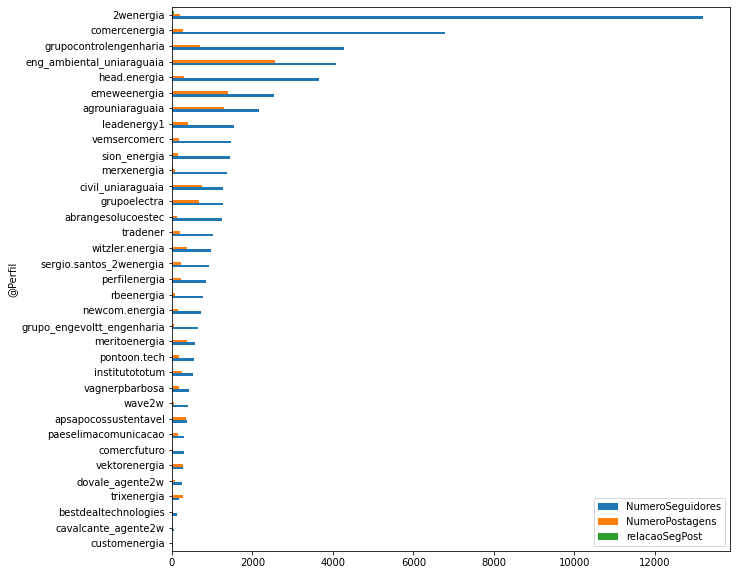

In [166]:
data.sort_values('NumeroSeguidores',ascending=True).plot.barh(x='@Perfil',figsize=[10,10])

<AxesSubplot:ylabel='@Perfil'>

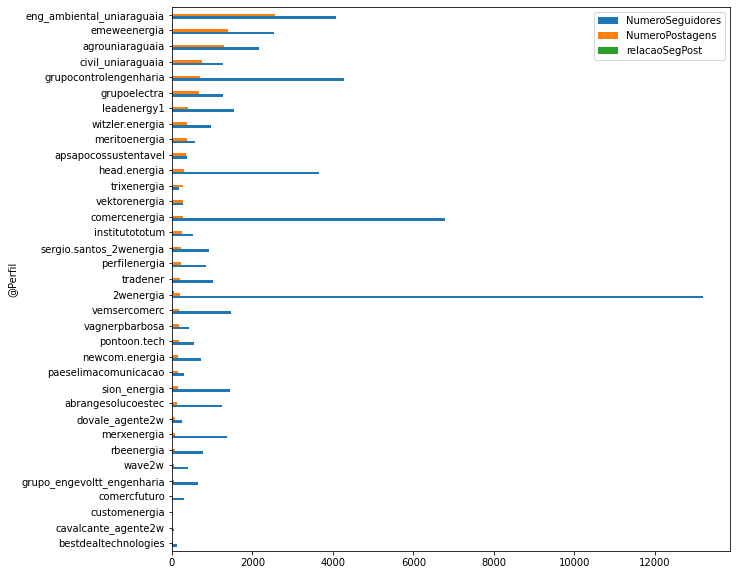

In [167]:
data.sort_values('NumeroPostagens',ascending=True).plot.barh(x='@Perfil',figsize=[10,10])

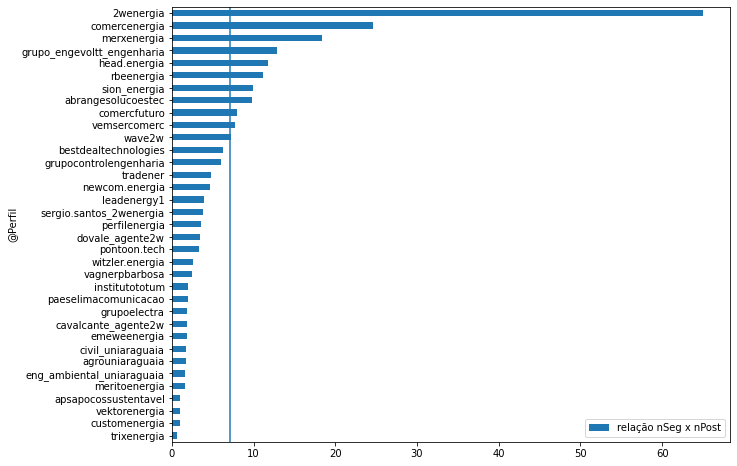

In [159]:
ax = data.sort_values('relacaoSegPost',ascending=True).plot.barh(x='@Perfil',y='relacaoSegPost',figsize=[10,8],label='relação nSeg x nPost')
mem = data['relacaoSegPost'].mean()
ax.axvline(mem)

<AxesSubplot:xlabel='NumeroSeguidores', ylabel='NumeroPostagens'>

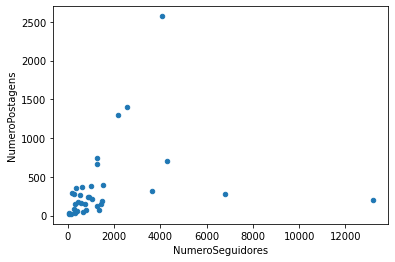

In [161]:
data.plot.scatter(x='NumeroSeguidores',y='NumeroPostagens')